Original - MSE: 6413.126128992174, R^2: 0.40600391479679765


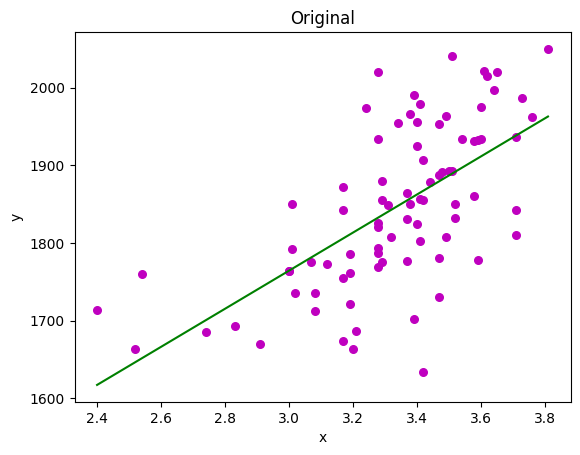

Without Outliers - MSE: 6413.126128992174, R^2: 0.40600391479679765


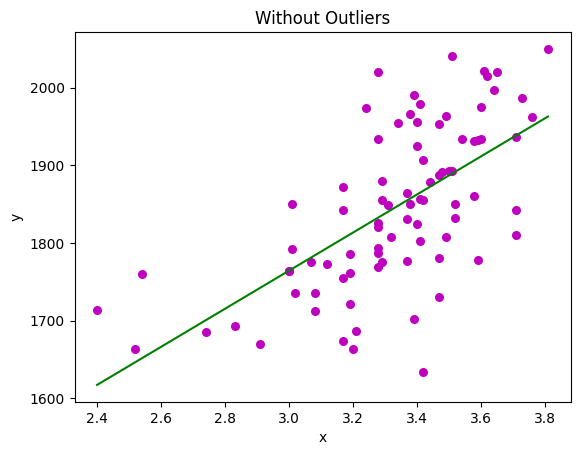

Original - MSE: 6413.126128992174, R^2: 0.40600391479679765


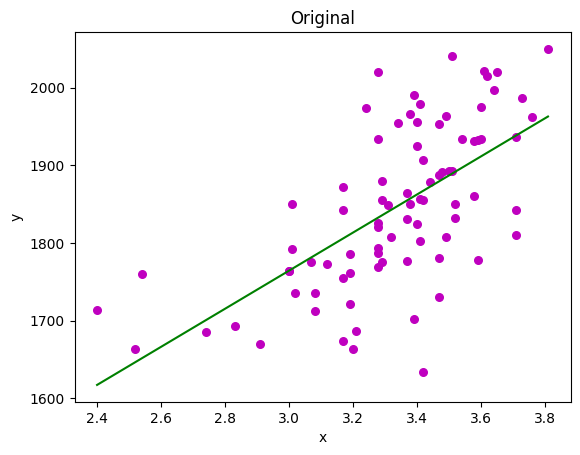

Logarithmic - MSE: 0.0018791870047962045, R^2: 0.4091129907268003


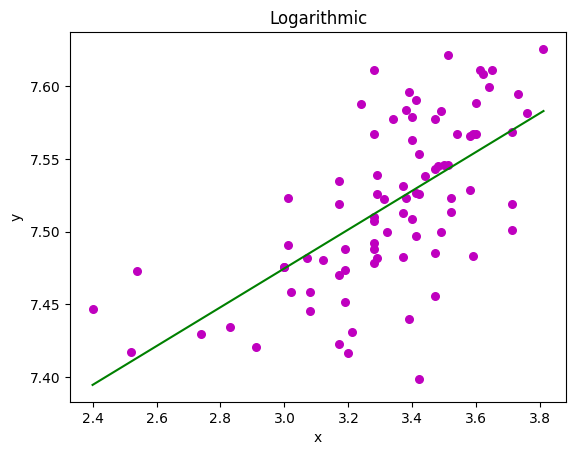

Square Root - MSE: 0.8670548432779855, R^2: 0.4076613378057067


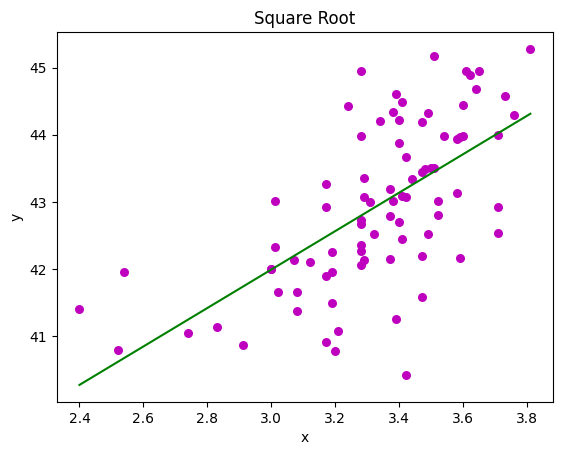

Inverse - MSE: 5.548948676407339e-10, R^2: 0.4113743834043656


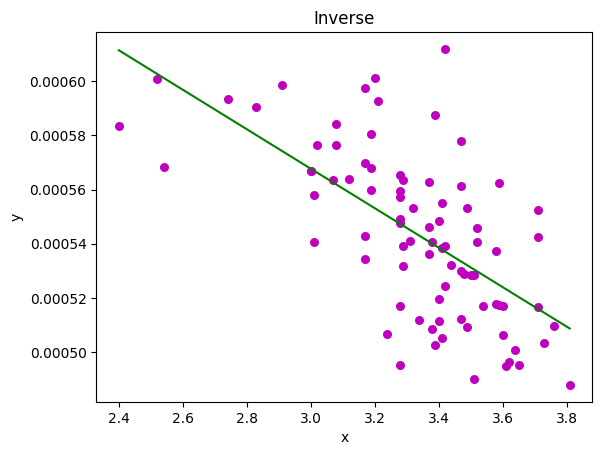

Box-Cox - MSE: 2.2316893739154606, R^2: 0.4077521703535215


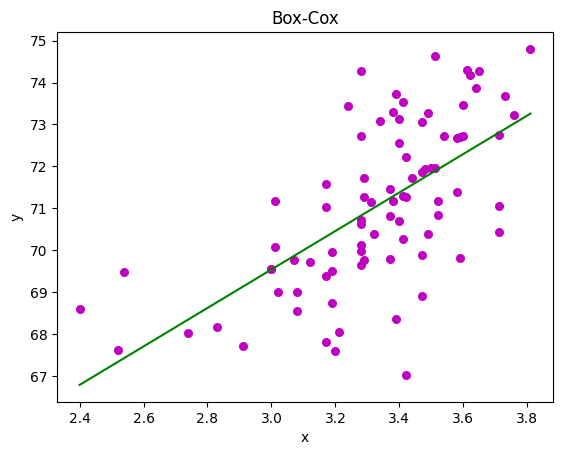

Yeo-Johnson - MSE: 2.2234804520379137, R^2: 0.40775193843241053


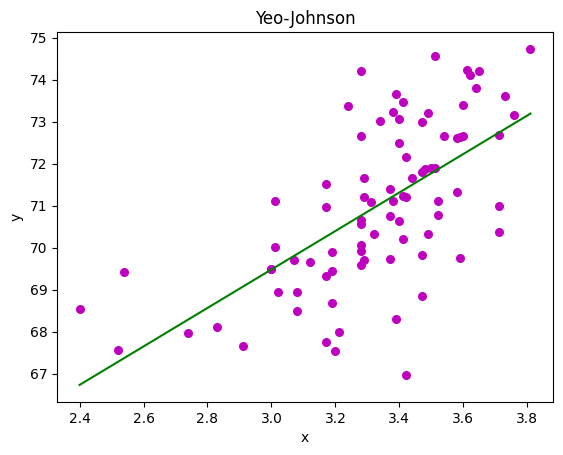

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

def estimate_coefficients(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b, title='Linear Regression'):
    fig, ax = plt.subplots()
    ax.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    ax.plot(x, y_pred, color = "g")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{title} - MSE: {mse}, R^2: {r2}")
    plt.title(title)
    plt.show()

def main():
    # Original data
    y = np.array([1714,1664,1760,1685,1693,1670,1764,1764,1792,1850,1735,1775,1735,1712,1773,1872,1755,1674,1842,1786,1761,1722,1663,1687,1974,1826,1787,1821,2020,1794,1769,1934,1775,1855,1880,1849,1808,1954,1777,1831,1865,1850,1966,1702,1990,1925,1824,1956,1857,1979,1802,1855,1907,1634,1879,1887,1730,1953,1781,1891,1964,1808,1893,2041,1893,1832,1850,1934,1861,1931,1933,1778,1975,1934,2021,2015,1997,2020,1843,1936,1810,1987,1962,2050])
    x = np.array([2.4,2.52,2.54,2.74,2.83,2.91,3,3,3.01,3.01,3.02,3.07,3.08,3.08,3.12,3.17,3.17,3.17,3.17,3.19,3.19,3.19,3.2,3.21,3.24,3.28,3.28,3.28,3.28,3.28,3.28,3.28,3.29,3.29,3.29,3.31,3.32,3.34,3.37,3.37,3.37,3.38,3.38,3.39,3.39,3.4,3.4,3.4,3.41,3.41,3.41,3.42,3.42,3.42,3.44,3.47,3.47,3.47,3.47,3.48,3.49,3.49,3.5,3.51,3.51,3.52,3.52,3.54,3.58,3.58,3.59,3.59,3.6,3.6,3.61,3.62,3.64,3.65,3.71,3.71,3.71,3.73,3.76,3.81])

    # Estimation of coefficients and plot for original data
    b_original = estimate_coefficients(x, y)
    plot_regression_line(x, y, b_original, "Original")

    # Outliers removal
    Q1, Q3 = np.percentile(y, [25, 75])
    IQR = Q3 - Q1
    mask = ~((y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR)))
    y_without_outliers = y[mask]
    x_without_outliers = x[mask]

    # Coefficients estimation and plot without outliers
    b_without_outliers = estimate_coefficients(x_without_outliers, y_without_outliers)
    plot_regression_line(x_without_outliers, y_without_outliers, b_without_outliers, "Without Outliers")

    # Logarithmic transformation of Y without outliers
    y_transformed = np.log(y_without_outliers)

    # Coefficients estimation and plot for original data
    b_original = estimate_coefficients(x, y)
    plot_regression_line(x, y, b_original, "Original")

    # Logarithmic transformation
    y_log = np.log(y)
    b_log = estimate_coefficients(x, y_log)
    plot_regression_line(x, y_log, b_log, "Logarithmic")

    # Square root transformation
    y_sqrt = np.sqrt(y)
    b_sqrt = estimate_coefficients(x, y_sqrt)
    plot_regression_line(x, y_sqrt, b_sqrt, "Square Root")

    # Inverse transformation
    y_inv = 1 / y
    b_inv = estimate_coefficients(x, y_inv)
    plot_regression_line(x, y_inv, b_inv, "Inverse")

    # Box-Cox transformation
    y_box_cox, _ = stats.boxcox(y)
    b_box_cox = estimate_coefficients(x, y_box_cox)
    plot_regression_line(x, y_box_cox, b_box_cox, "Box-Cox")

    # Yeo-Johnson transformation
    y_yeo_johnson, _ = stats.yeojohnson(y)
    b_yeo_johnson = estimate_coefficients(x, y_yeo_johnson)
    plot_regression_line(x, y_yeo_johnson, b_yeo_johnson, "Yeo-Johnson")

if __name__ == "__main__":
    main()


## Results

Original - MSE: 6413.126128992174, R^2: 0.40600391479679765

Without Outliers - MSE: 6413.126128992174, R^2: 0.40600391479679765 (it's the same, perhaps trying to remove some outliers manually could be explored.)

Logarithmic - MSE: 0.0018791870047962045, R^2: 0.4091129907268003

Square Root - MSE: 0.8670548432779855, R^2: 0.4076613378057067

Inverse - MSE: 5.548948676407339e-10, R^2: 0.4113743834043656

Box-Cox - MSE: 2.2316893739154606, R^2: 0.4077521703535215

Yeo-Johnson - MSE: 2.2234804520379137, R^2: 0.40775193843241053

## Analysis

The results indicate that applying different data transformations has had a varied impact on both the mean squared error (MSE) and the coefficient of determination (R^2).

The **logarithmic transformation** has notably improved the MSE, suggesting a significant reduction in the magnitude of errors between the predictions and the actual values.

However, the change in R^2 has been minimal, indicating that while predictions have become more accurate in absolute terms, the proportion of variance in the dependent variable explained by the model has not increased significantly.

On the other hand, the **inverse transformation** shows the lowest MSE among all the transformations, but like the others, the change in R^2 is relatively minor. This suggests that although the predictions are very accurate in terms of error magnitude, the model's ability to explain variance in the data does not improve substantially.

The  **square root, Box-Cox, and Yeo-Johnson**  transformations also show improvements in MSE, but do not outperform the inverse transformation in terms of reducing average error. Additionally, these transformations offer similar results in terms of R^2, suggesting a comparable improvement in the proportion of variance explained by the model.

Although the removal of outliers **has not shown an improvement in MSE** or R^2, this process **is crucial** to prevent the model's predictions from being negatively influenced by outlier values that do not represent the overall trend of the data.

These results underline the importance of exploring different data transformations to improve the accuracy of linear regression models. While some transformations may be more effective than others in reducing prediction errors, it's essential to evaluate how each one affects the model's ability to explain variance in the data. Moreover, considering other techniques or more complex models is recommended if the goal is to substantially improve the model's fit to the data.

## Observation - Consider polynomial regression
The data seems to follow a curved line rather than a linear one.  **Consider polynomial regression?** (next .ipnyb)

## Advanced Machine Learning Models

Exploring more advanced machine learning models, such as decision trees and their ensembles (Random Forest, Gradient Boosting), or even neural networks, can capture complex and non-linear relationships between variables without the need to specify a functional form a priori. These models inherently deal with non-linearity, making them potentially more suitable for datasets where the relationship between independent and dependent variables doesn't follow a straightforward linear trend. In this case, I didn't use this models.

## Transformations

Each of these transformations aims to modify the distribution of the dependent variable's data (in this case, y) to improve the linearity of the relationship with the independent variable (in this case, x), thereby improving the fit of a linear regression model. Below, I explain the purpose and effect of each transformation based on the results you provided:


Logarithmic Transformation

MSE: 0.0018791870047962045
R^2: 0.4091129907268003
The logarithmic transformation is beneficial when data have an exponential distribution or when there's a large disparity between maximum and minimum values. It helps reduce the variance of errors and make the relationship between variables more linear. In this case, it significantly improved the MSE, indicating much more accurate model predictions in absolute terms, though the improvement in R^2 was marginal.

Square Root Transformation

MSE: 0.8670548432779855
R^2: 0.4076613378057067
Similar to the logarithmic transformation, the square root transformation helps to stabilize the variance and linearize the relationship between variables, particularly useful for data following a quadratic distribution. The results show an improvement in MSE, though not as pronounced as with the logarithmic transformation.

Inverse Transformation

MSE: 5.548948676407339e-10
R^2: 0.4113743834043656
The inverse transformation (1/y) is effective when larger values in the dataset carry more weight or influence in the relationship. It can help to lessen the impact of outliers. In this instance, the MSE dramatically reduced, indicating an improvement in the accuracy of predictions, and R^2 shows a slight improvement.

Box-Cox Transformation

MSE: 2.2316893739154606
R^2: 0.4077521703535215

The Box-Cox transformation is a generalization of logarithmic and square root transformations, used to correct skewed distributions. It requires all data to be positive. This transformation showed an improvement in MSE, though not as significant as some other transformations.

Yeo-Johnson Transformation

MSE: 2.2234804520379137
R^2: 0.40775193843241053
Similar to Box-Cox but can be applied to data with zero or negative values. The Yeo-Johnson transformation seeks to improve normality and the homogeneity of variance.